In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# cv2.Canny()，就可以完成以上几步。
让我们看如何使用这个函数。这个函数的第一个参数是输入图像。第二和第三
个分别是 minVal 和 maxVal。第三个参数设置用来计算图像梯度的 Sobel
卷积核的大小，默认值为 3。最后一个参数是 L2gradient，它可以用来设定
求梯度大小的方程。如果设为 True，就会使用我们上面提到过的方程，否则
使用方程： Edge−Gradient (G) = jG2 xj + jG2 yj 代替，默认值为 False。

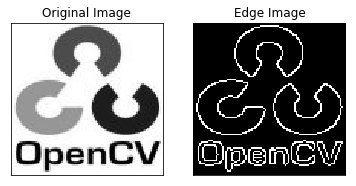

In [2]:
#Canny 边界检测
img = cv2.imread('rio.jpg',0)
edges = cv2.Canny(img,100,200)
plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.show()

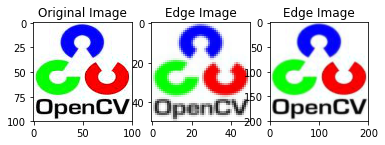

In [18]:
img = cv2.imread('rio.jpg')
lower_reso = cv2.pyrDown(img)
higher_reso = cv2.pyrUp(img)
plt.subplot(131),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), #plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(lower_reso,cmap = 'gray')
plt.title('Edge Image'), #plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(higher_reso,cmap = 'gray')
plt.title('Edge Image')
plt.show()

# cv2.findContours() 有三个参数，第一个是输入图像，第二个是
轮廓检索模式，第三个是轮廓近似方法。返回值有三个，第一个是图像，第二个
是轮廓，第三个是（轮廓的）层析结构。轮廓（第二个返回值）是一个 Python
列表，其中存储这图像中的所有轮廓。每一个轮廓都是一个 Numpy 数组，包
含对象边界点（x， y）的坐标。

#  cv2.drawContours() 可以被用来绘制轮廓。它可以根据你提供
的边界点绘制任何形状。它的第一个参数是原始图像，第二个参数是轮廓，一
个 Python 列表。第三个参数是轮廓的索引（在绘制独立轮廓是很有用，当设
置为 -1 时绘制所有轮廓）。接下来的参数是轮廓的颜色和厚度等“”

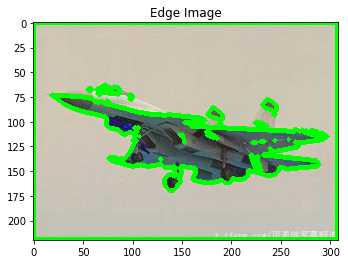

In [93]:
#金字塔进行图像融合
img = cv2.imread('1.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE )
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
plt.imshow(img,cmap = 'gray')
plt.title('Edge Image')
plt.show()

(12,)


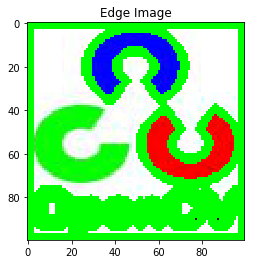

In [75]:
# 轮廓的近似方法
img = cv2.imread('rio.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img = cv2.drawContours(img, contours, -1, (0,255,0), 3)
print(np.array(contours).shape)
plt.imshow(img)
plt.title('Edge Image')
plt.show()

# 矩

In [22]:
img = cv2.imread('rio.jpg',0)
ret,thresh = cv2.threshold(img,127,255,0)
image, contours, hierarchy  = cv2.findContours(thresh, 1, 2)
cnt = contours[0]
M = cv2.moments(cnt)
print (M)

{'m01': 596.6666666666666, 'mu20': 11.25, 'nu02': 0.036119209588814184, 'mu02': 1.769841269851895, 'mu11': 0.0, 'm30': 501714.25, 'nu30': 0.0, 'nu03': -0.0035378598857141023, 'm10': 290.5, 'nu20': 0.22959183673469385, 'nu21': 0.01764936144711347, 'm00': 7.0, 'mu03': -0.4586545741185546, 'm11': 24761.666666666664, 'm12': 2110710.75, 'm20': 12067.0, 'm21': 1028570.3833333333, 'mu21': 2.288095238219512, 'm02': 50860.5, 'mu30': 0.0, 'mu12': -1.6007106751203537e-10, 'nu12': -1.2347178913512423e-12, 'm03': 4335553.4, 'nu11': 0.0}


(12,)


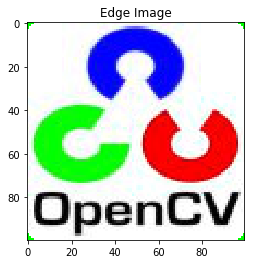

In [79]:
#凸包
img = cv2.imread('rio.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]
hull = cv2.convexHull(cnt)
img = cv2.drawContours(img, hull, -1, (0,255,0), 3)

print(np.array(contours).shape)
plt.imshow(img)
plt.title('Edge Image')
plt.show()


(12,)


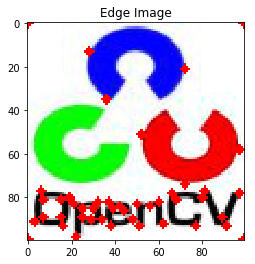

In [90]:
#轮廓近似
img = cv2.imread('rio.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
for cnt in contours:
    epsilon = 0.1*cv2.arcLength(cnt,True)
    approx = cv2.approxPolyDP(cnt,epsilon,True)
    img = cv2.drawContours(img, approx, -1, 255, 3)

print(np.array(contours).shape)
plt.imshow(img)
plt.title('Edge Image')
plt.show()


(42,)


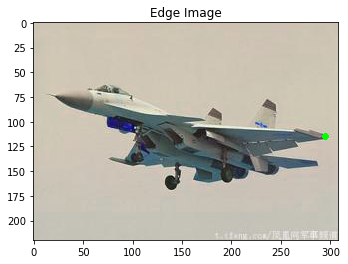

In [92]:
#旋转的边界矩形
img = cv2.imread('1.jpg')
imgray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(imgray,127,255,0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cnt = contours[1]
(x,y),radius = cv2.minEnclosingCircle(cnt)
center = (int(x),int(y))
radius = int(radius)
img = cv2.circle(img,center,radius,(0,255,0),2)

print(np.array(contours).shape)
plt.imshow(img)
plt.title('Edge Image')
plt.show()

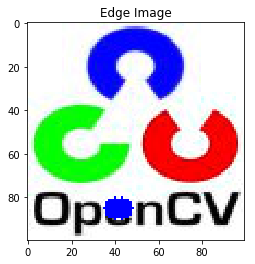

In [95]:
img = cv2.imread('rio.jpg')
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255,0)
images, contours,hierarchy = cv2.findContours(thresh,2,1)
cnt = contours[0]
hull = cv2.convexHull(cnt,returnPoints = False)
defects = cv2.convexityDefects(cnt,hull)
for i in range(defects.shape[0]):
    s,e,f,d = defects[i,0]
    start = tuple(cnt[s][0])
    end = tuple(cnt[e][0])
    far = tuple(cnt[f][0])
    img = cv2.line(img,start,end,[0,255,0],2)
    img = cv2.circle(img,far,5,[0,0,255],-1)
plt.imshow(img)
plt.title('Edge Image')
plt.show()